In [2]:
import pandas as pd

In [3]:
DATA_PATH = "../../kaggle_data/digit-recognizer/"
train_data = pd.read_csv(DATA_PATH+"train.csv")
test_data = pd.read_csv(DATA_PATH+'test.csv')

In [4]:
X = train_data.drop(['label'],axis=1)
y = train_data['label']

<Axes: xlabel='label', ylabel='count'>

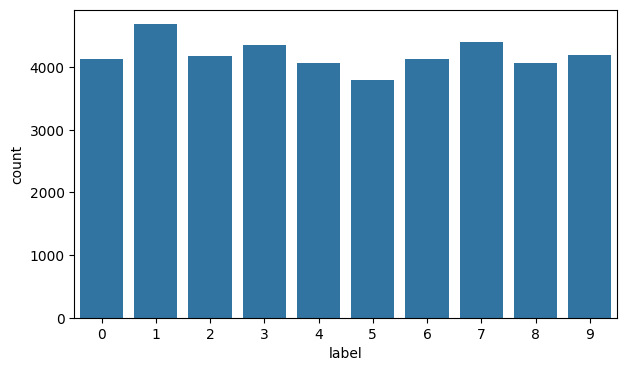

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.countplot(x=train_data.loc[:,'label'])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [7]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
14796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import tensorflow as tf

In [9]:
y_train_enc = tf.keras.utils.to_categorical(y_train)
y_valid_enc = tf.keras.utils.to_categorical(y_valid)

In [10]:
y_train

14796    1
7677     4
8651     0
3391     3
41956    4
        ..
27045    6
29275    9
31039    8
1232     4
23715    0
Name: label, Length: 33600, dtype: int64

In [11]:
y_valid_enc.shape

(8400, 10)

In [12]:
X_train.shape

(33600, 784)

In [13]:
X_train = X_train.values.reshape(-1,28,28,1)
X_valid = X_valid.values.reshape(-1,28,28,1)

In [14]:
X_train.shape

(33600, 28, 28, 1)

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

def model():
    nn = tf.keras.models.Sequential()
    nn.add(Conv2D(64, kernel_size=(3,3), kernel_initializer='he_normal', input_shape=(28,28,1), activation='relu'))
    nn.add(Conv2D(64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
    nn.add(MaxPooling2D(pool_size=(2,2)))
    nn.add(BatchNormalization())
    nn.add(Conv2D(128, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
    nn.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
    nn.add(MaxPooling2D(pool_size=(2,2)))
    nn.add(Dropout(0.2))
    nn.add(Conv2D(256, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
    nn.add(MaxPooling2D(pool_size=(2,2)))
    nn.add(Flatten())
    nn.add(Dense(2048, activation='relu'))
    nn.add(Dense(10, activation='softmax'))

    nn.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return nn


In [17]:
model = model()
model.summary()

c:\Users\livid\miniconda3\envs\kaggle\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │       526,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,101,258 (4.20 MB)

 Trainable params: 1,101,130 (4.20 MB)

 Non-trainable params: 128 (512.00 B)

In [18]:
y_train.shape

(33600,)

In [19]:
y_train_enc.shape

(33600, 10)

In [20]:
model.fit(X_train, y_train_enc, batch_size=5, epochs=20)

Epoch 1/20
6720/6720 ━━━━━━━━━━━━━━━━━━━━ 52s 8ms/step - accuracy: 0.8861 - loss: 0.3960
Epoch 2/20
6720/6720 ━━━━━━━━━━━━━━━━━━━━ 51s 8ms/step - accuracy: 0.9670 - loss: 0.1282
Epoch 3/20
6720/6720 ━━━━━━━━━━━━━━━━━━━━ 53s 8ms/step - accuracy: 0.9766 - loss: 0.0947
Epoch 4/20
6720/6720 ━━━━━━━━━━━━━━━━━━━━ 52s 8ms/step - accuracy: 0.9796 - loss: 0.0812
Epoch 5/20
6720/6720 ━━━━━━━━━━━━━━━━━━━━ 60s 9ms/step - accuracy: 0.9813 - loss: 0.0749
Epoch 6/20
6720/6720 ━━━━━━━━━━━━━━━━━━━━ 57s 9ms/step - accuracy: 0.9840 - loss: 0.0663
Epoch 7/20
6720/6720 ━━━━━━━━━━━━━━━━━━━━ 50s 8ms/step - accuracy: 0.9855 - loss: 0.0609
Epoch 8/20
6720/6720 ━━━━━━━━━━━━━━━━━━━━ 56s 8ms/step - accuracy: 0.9845 - loss: 0.0683
Epoch 9/20
6720/6720 ━━━━━━━━━━━━━━━━━━━━ 58s 9ms/step - accuracy: 0.9865 - loss: 0.0597
Epoch 10/20
6720/6720 ━━━━━━━━━━━━━━━━━━━━ 53s 8ms/step - accuracy: 0.9872 - loss: 0.0559
Epoch 11/20
6720/6720 ━━━━━━━━━━━━━━━━━━━━ 57s 9ms/step - accuracy: 0.9879 - loss: 0.0560
Epoch 12/20
6720/67

In [21]:
loss, acc = model.evaluate(X_valid, y_valid_enc)

263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9826 - loss: 0.1071


In [22]:
print('Loss = ',loss)
print('Accuracy = ',acc*100)

Loss =  0.12327408790588379
Accuracy =  98.15475940704346


In [23]:
pred = model.predict(test_data.values.reshape(-1, 28, 28, 1))
pred.shape

875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step


(28000, 10)

In [24]:
import numpy as np
preds = []
for i in range(28000):
    preds.append(np.argmax(pred[i]))

In [28]:
sub = pd.read_csv('../../kaggle_data/digit-recognizer/sample_submission.csv')
sub['Label'] = preds

In [29]:
sub.to_csv('../../kaggle_data/digit-recognizer/submission.csv',index=False)

### The Score is 98.217!